# Plotting results

## Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import os
import pandas as pd

def read_csv_files(folder_path):
    csv_dataframes = []
    
    # Walk through the directory
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                try:
                    # Read the CSV file
                    df = pd.read_csv(file_path)
                    csv_dataframes.append(df)
                    print(f"Successfully read: {file_path}")
                except Exception as e:
                    print(f"Error reading {file_path}: {str(e)}")
    
    return csv_dataframes

# Usage
folder_path = './dataset/'  # Replace with your folder path
dataframes = read_csv_files(folder_path)

# Print the number of CSV files read
print(f"\nTotal number of CSV files read: {len(dataframes)}")

# You can now work with the list of dataframes
# For example, to see the shape of each dataframe:
for i, df in enumerate(dataframes):
    print(f"Dataframe {i} shape: {df.shape}")

Successfully read: ./dataset/electricity/electricity.csv
Successfully read: ./dataset/ETT-small/ETTh1.csv
Successfully read: ./dataset/ETT-small/ETTh2.csv
Successfully read: ./dataset/ETT-small/ETTm1.csv
Successfully read: ./dataset/ETT-small/ETTm2.csv
Successfully read: ./dataset/exchange_rate/exchange_rate.csv
Successfully read: ./dataset/traffic/traffic.csv
Successfully read: ./dataset/weather/weather.csv

Total number of CSV files read: 8
Dataframe 0 shape: (26304, 322)
Dataframe 1 shape: (17420, 8)
Dataframe 2 shape: (17420, 8)
Dataframe 3 shape: (69680, 8)
Dataframe 4 shape: (69680, 8)
Dataframe 5 shape: (7588, 9)
Dataframe 6 shape: (17544, 863)
Dataframe 7 shape: (52696, 22)


In [7]:
# read numpy
import numpy as np
solar = np.loadtxt('./dataset/Solar/solar_AL.txt', delimiter=',')
solar.shape

(52560, 137)

In [11]:
# load npz
pems=np.load('./dataset/PEMS/PEMS03.npz')
pems.files[0]
pems['data'].shape

(26208, 358, 1)

In [ ]:
datasetNames=['ETC','ETT','Exchange rate','PEMS','Solar','Traffic','Weather']
dataset_shape=[[26304, 322],[17420, 8],[7588, 9],[26208, 358],[52560, 137],[17544, 863],[52696, 22]]


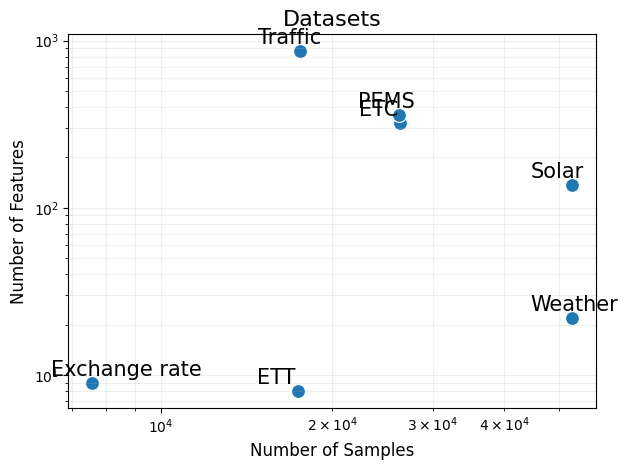

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
datasetNames = ['ETC', 'ETT', 'Exchange rate', 'PEMS', 'Solar', 'Traffic', 'Weather']
dataset_shape = [[26304, 322], [17420, 8], [7588, 9], [26208, 358], [52560, 137], [17544, 863], [52696, 22]]

# Create a DataFrame
df = pd.DataFrame({
    'Dataset': datasetNames,
    'Samples': [shape[0] for shape in dataset_shape],
    'Features': [shape[1] for shape in dataset_shape]
})

# Create the plot
plt.figure()
sns.scatterplot(data=df, x='Samples', y='Features', s=100)

# Add labels for each point
for i, row in df.iterrows():
    plt.annotate(row['Dataset'], (row['Samples'], row['Features']), 
                 xytext=(-30, 5), textcoords='offset points',fontsize=15)

# Customize the plot
plt.title('Datasets', fontsize=16)
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Number of Features', fontsize=12)
plt.xscale('log')  # Use log scale for x-axis due to large differences
plt.yscale('log')  # Use log scale for y-axis due to large differences

# Add gridlines
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

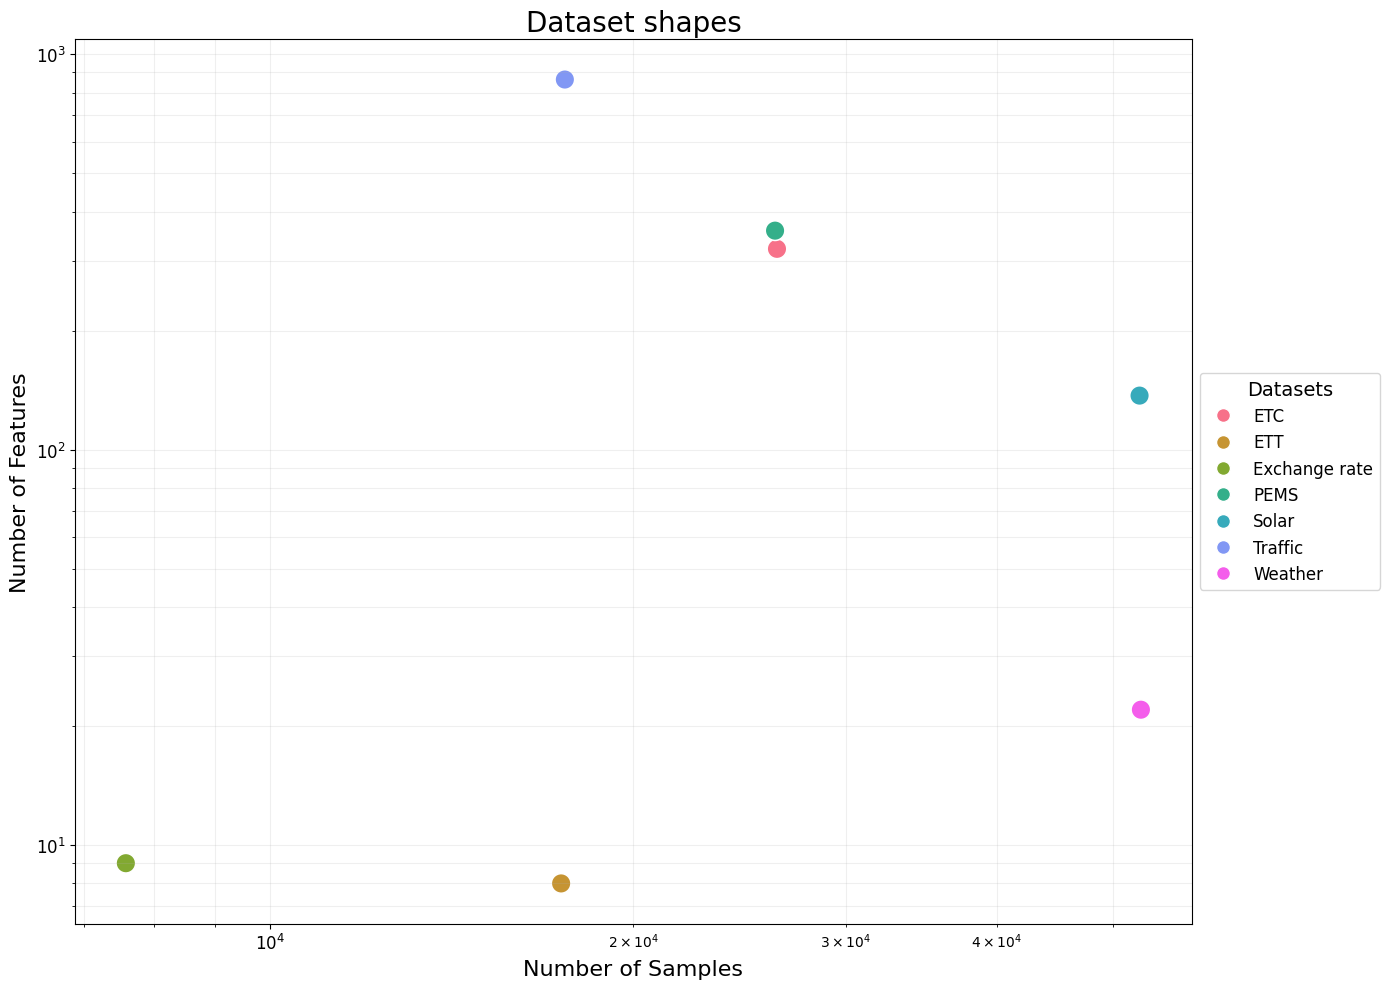

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
datasetNames = ['ETC', 'ETT', 'Exchange rate', 'PEMS', 'Solar', 'Traffic', 'Weather']
dataset_shape = [[26304, 322], [17420, 8], [7588, 9], [26208, 358], [52560, 137], [17544, 863], [52696, 22]]

# Create a DataFrame
df = pd.DataFrame({
    'Dataset': datasetNames,
    'Samples': [shape[0] for shape in dataset_shape],
    'Features': [shape[1] for shape in dataset_shape]
})

# Create a color palette
palette = sns.color_palette("husl", n_colors=len(datasetNames))

# Create the plot
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=df, x='Samples', y='Features', s=200, hue='Dataset', palette=palette)

# Remove the legend (we'll create a custom one)
scatter.legend_.remove()

# Add labels for each point
# for i, row in df.iterrows():
#     plt.annotate(row['Dataset'], (row['Samples'], row['Features']), 
#                  xytext=(7, 7), textcoords='offset points', 
#                  fontsize=14, fontweight='bold', color=palette[i])

# Customize the plot
plt.title('Dataset shapes', fontsize=20)
plt.xlabel('Number of Samples', fontsize=16)
plt.ylabel('Number of Features', fontsize=16)
plt.xscale('log')  # Use log scale for x-axis due to large differences
plt.yscale('log')  # Use log scale for y-axis due to large differences

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=12)

# Add gridlines
plt.grid(True, which="both", ls="-", alpha=0.2)

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=dataset,
                              markerfacecolor=color, markersize=10)
                   for dataset, color in zip(datasetNames, palette)]
plt.legend(handles=legend_elements, title='Datasets', title_fontsize=14, 
           fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Test data comparison different pred_len

In [13]:
import pandas as pd
import re

def parse_line(line):
    # Split the line into two parts: configuration and metrics
    config, metrics = line.strip().split('\n')
    
    # Parse configuration
    parts = config.split('_')
    dataset = parts[0]
    model = next(part for part in parts if part in ['Transformer', 'iTransformer', 'iTransformer1dSplit'])
    
    # Extract input and output lengths
    input_length = next(part for part in parts if part.startswith('ft'))
    input_length = input_length[2:]  # Remove 'ft' prefix
    output_length = next(part for part in parts if part.startswith('ll'))
    output_length = output_length[2:]  # Remove 'll' prefix
    
    # Parse metrics
    mse = float(re.search(r'mse:([\d.]+)', metrics).group(1))
    mae = float(re.search(r'mae:([\d.]+)', metrics).group(1))
    
    return [dataset, model, input_length, output_length, mse, mae]

data = []
with open('./result_long_term_forecast.txt', 'r') as file:
    content = file.read().strip().split('\n\n')
    for entry in content:
        print(parse_line(entry))
        data.append(parse_line(entry))

df = pd.DataFrame(data, columns=['Dataset', 'Model', 'Input_length', 'Output_length', 'MSE', 'MAE'])

# Convert Input_length and Output_length to integers
df['Input_length'] = df['Input_length'].astype(int)
df['Output_length'] = df['Output_length'].astype(int)

print(df.head())

['ECL', 'Transformer', '96', '96', 0.31126269698143005, 0.39882892370224]
['ECL', 'Transformer', '96', '192', 0.3448021113872528, 0.4267951548099518]
['ECL', 'Transformer', '96', '336', 0.3484726846218109, 0.42713993787765503]
['ECL', 'Transformer', '720', '336', 0.3607260286808014, 0.4294426441192627]
['ECL', 'Transformer', '336', '336', 0.3544771373271942, 0.42983129620552063]
['ECL', 'Transformer', '192', '336', 0.35672539472579956, 0.43364083766937256]
['ECL', 'iTransformer', '96', '96', 0.18947644531726837, 0.2756558954715729]
['ECL', 'iTransformer', '96', '192', 0.20011864602565765, 0.28754180669784546]
['ECL', 'iTransformer', '96', '336', 0.22046895325183868, 0.3075980246067047]
['ECL', 'iTransformer', '96', '336', 0.22046895325183868, 0.3075980246067047]
['ECL', 'iTransformer', '336', '336', 0.1916213184595108, 0.291077584028244]
['ECL', 'iTransformer1dSplit', '96', '96', 0.19580727815628052, 0.2957936227321625]
['ECL', 'iTransformer1dSplit', '96', '192', 0.20970305800437927, 0

In [14]:
df

,Dataset,Model,Input_length,Output_length,MSE,MAE
0,ECL,Transformer,96,96,0.311263,0.398829
1,ECL,Transformer,96,192,0.344802,0.426795
2,ECL,Transformer,96,336,0.348473,0.427140
3,ECL,Transformer,720,336,0.360726,0.429443
4,ECL,Transformer,336,336,0.354477,0.429831
...,...,...,...,...,...,...
139,weather,iTransformer1dSplit,96,192,0.213299,0.255012
140,weather,iTransformer1dSplit,96,336,0.272819,0.297549
141,weather,iTransformer1dSplit,720,336,0.246176,0.288838
142,weather,iTransformer1dSplit,336,336,0.254880,0.294645


In [15]:
# Summary Table
summary = df.groupby(['Dataset', 'Model']).agg({
    'MSE': 'min',
    'MAE': 'min',
    'Input_length': lambda x: x[df.groupby(['Dataset', 'Model'])['MSE'].transform('min') == df['MSE']].iloc[0],
    'Output_length': lambda x: x[df.groupby(['Dataset', 'Model'])['MSE'].transform('min') == df['MSE']].iloc[0]
}).reset_index()

summary


,Dataset,Model,MSE,MAE,Input_length,Output_length
0,ECL,Transformer,0.249665,0.349949,96,96
1,ECL,iTransformer,0.167462,0.256914,96,96
2,ECL,iTransformer1dSplit,0.180147,0.280937,96,96
3,ETTh1,Transformer,0.796016,0.702380,96,96
4,ETTh1,iTransformer,0.387790,0.406386,96,96
5,ETTh1,iTransformer1dSplit,0.393983,0.415327,96,96
6,Exchange,Transformer,0.677474,0.637843,96,96
7,Exchange,iTransformer,0.086314,0.206543,96,96
8,Exchange,iTransformer1dSplit,0.086183,0.207386,96,96
9,PEMS03,Transformer,0.105133,0.204023,48,12


In [16]:
# make summary latex table
def to_latex(df):
    latex = df.to_latex(index=False, escape=False)
    latex = latex.replace('\\toprule', '\\hline')
    latex = latex.replace('\\midrule', '\\hline')
    latex = latex.replace('\\bottomrule', '\\hline')
    return latex

print(to_latex(summary))

\begin{tabular}{llrrrr}
\hline
Dataset & Model & MSE & MAE & Input_length & Output_length \\
\hline
ECL & Transformer & 0.249665 & 0.349949 & 96 & 96 \\
ECL & iTransformer & 0.167462 & 0.256914 & 96 & 96 \\
ECL & iTransformer1dSplit & 0.180147 & 0.280937 & 96 & 96 \\
ETTh1 & Transformer & 0.796016 & 0.702380 & 96 & 96 \\
ETTh1 & iTransformer & 0.387790 & 0.406386 & 96 & 96 \\
ETTh1 & iTransformer1dSplit & 0.393983 & 0.415327 & 96 & 96 \\
Exchange & Transformer & 0.677474 & 0.637843 & 96 & 96 \\
Exchange & iTransformer & 0.086314 & 0.206543 & 96 & 96 \\
Exchange & iTransformer1dSplit & 0.086183 & 0.207386 & 96 & 96 \\
PEMS03 & Transformer & 0.105133 & 0.204023 & 48 & 12 \\
PEMS03 & iTransformer & 0.073994 & 0.179749 & 48 & 12 \\
PEMS03 & iTransformer1dSplit & 0.066601 & 0.170845 & 48 & 12 \\
solar & Transformer & 0.198320 & 0.232168 & 96 & 192 \\
solar & iTransformer & 0.212609 & 0.245238 & 96 & 96 \\
solar & iTransformer1dSplit & 0.224425 & 0.245268 & 96 & 96 \\
traffic & Transformer &

In [ ]:
# need pems split, solar split, traffic split 96

In [24]:
summary['Model'] = summary['Model'].replace('iTransformer1dSplit', 'TCiTransformer')

In [26]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Heatmap of MSE
plt.figure(figsize=(12, 8))
pivot = summary.pivot(index='Dataset', columns='Model', values='MSE')
sns.heatmap(pivot, annot=True, fmt='.4f', cmap='YlOrRd_r')
plt.title('Best MSE for Each Model Across Datasets')
plt.tight_layout()
plt.savefig('mse_heatmap.png')
plt.close()

# 2. Bar plot comparing models for each dataset
plt.figure(figsize=(15, 10))
sns.barplot(x='Dataset', y='MSE', hue='Model', data=summary)
plt.title('Best MSE for Each Model Across Datasets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('mse_barplot.png')
plt.close()

# 3. Line plot showing performance vs output length for each model
for dataset in df['Dataset'].unique():
    plt.figure(figsize=(10, 6))
    for model in df['Model'].unique():
        data = df[(df['Dataset'] == dataset) & (df['Model'] == model)]
        plt.plot(data['Output_length'], data['MSE'], marker='o', label=model)
    plt.title(f'MSE vs Output Length for {dataset}')
    plt.xlabel('Output Length')
    plt.ylabel('MSE')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{dataset}_mse_vs_output_length.png')
    plt.close()

print("Visualizations have been saved as PNG files.")

# Key Findings
best_model = summary.groupby('Model')['MSE'].mean().idxmin()
worst_model = summary.groupby('Model')['MSE'].mean().idxmax()

print("\nKey Findings:")
print(f"1. The model with the best overall performance (lowest average MSE) is: {best_model}")
print(f"2. The model with the worst overall performance (highest average MSE) is: {worst_model}")

for dataset in df['Dataset'].unique():
    best_model_dataset = summary[summary['Dataset'] == dataset]['MSE'].idxmin()
    print(f"3. For the {dataset} dataset, the best performing model is: {summary.loc[best_model_dataset, 'Model']}")

# print("4. Performance variation with output length:")
# for dataset in df['Dataset'].unique():
#     correlation = df[df['Dataset'] == dataset].groupby('Output_length')['MSE'].mean().corr(df[df['Dataset'] == dataset]['Output_length'].unique())
#     print(f"   - For {dataset}, the correlation between output length and MSE is: {correlation:.2f}")

Visualizations have been saved as PNG files.

Key Findings:
1. The model with the best overall performance (lowest average MSE) is: iTransformer
2. The model with the worst overall performance (highest average MSE) is: Transformer
3. For the ECL dataset, the best performing model is: iTransformer
3. For the ETTh1 dataset, the best performing model is: iTransformer
3. For the Exchange dataset, the best performing model is: TCiTransformer
3. For the PEMS03 dataset, the best performing model is: TCiTransformer
3. For the solar dataset, the best performing model is: Transformer
3. For the traffic dataset, the best performing model is: iTransformer
3. For the weather dataset, the best performing model is: TCiTransformer


In [21]:
def calculate_improvement(new_loss, old_loss):
    improvement = ((old_loss - new_loss) / old_loss) * 100
    return improvement

In [22]:
calculate_improvement(0.167566,0.183019)

8.443385659412408

## Improvements by using decoder

## Efficiency

In [27]:
TC_second_per_iter=[0.1393,0.1339,0.1281]
TC_seq_len=[428,198,112]
iTrans_second_per_iter=[0.1537,0.1410,0.1394]
seq_len=[720,336,192]



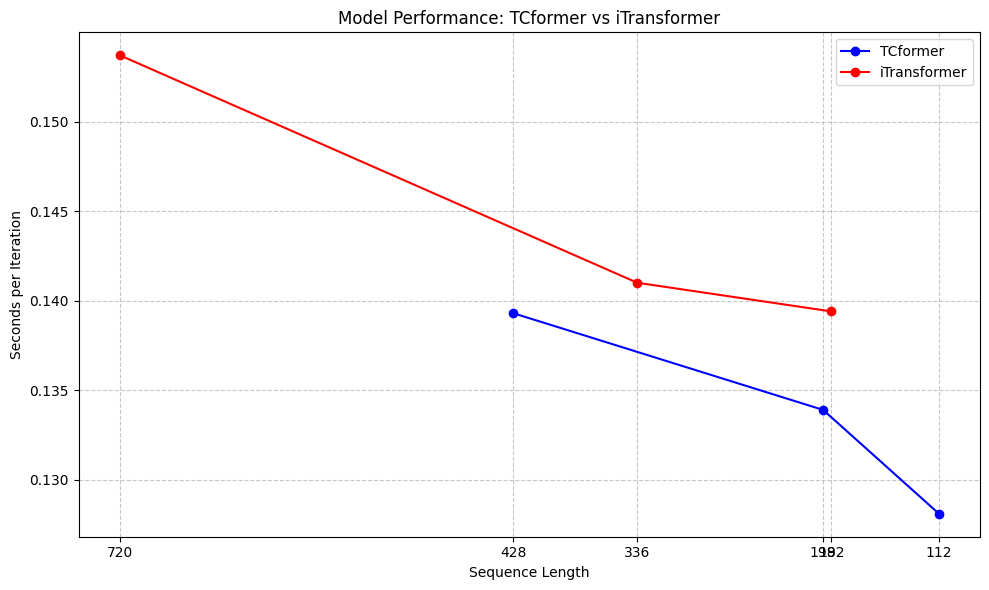

In [30]:
import matplotlib.pyplot as plt

# Data
TC_second_per_iter = [0.1393, 0.1339, 0.1281]
TC_seq_len = [428, 198, 112]
iTrans_second_per_iter = [0.1537, 0.1410, 0.1394]
iTrans_seq_len = [720, 336, 192]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot TCformer data
plt.plot(TC_seq_len, TC_second_per_iter, 'bo-', label='TCformer')

# Plot iTransformer data
plt.plot(iTrans_seq_len, iTrans_second_per_iter, 'ro-', label='iTransformer')

# Customize the plot
plt.xlabel('Sequence Length')
plt.ylabel('Seconds per Iteration')
plt.title('Model Performance: TCformer vs iTransformer')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust x-axis to show all sequence lengths
all_seq_lens = sorted(TC_seq_len + iTrans_seq_len)
plt.xticks(all_seq_lens)

# Invert x-axis to show decreasing sequence length
plt.gca().invert_xaxis()

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, save the plot
# plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

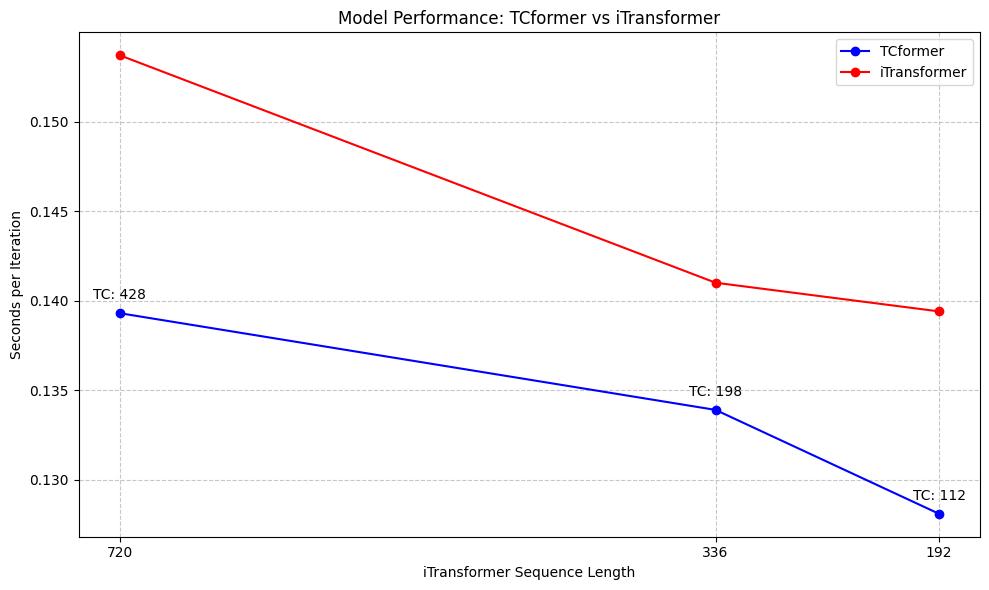

In [31]:
import matplotlib.pyplot as plt

# Data
TC_second_per_iter = [0.1393, 0.1339, 0.1281]
TC_seq_len = [428, 198, 112]
iTrans_second_per_iter = [0.1537, 0.1410, 0.1394]
iTrans_seq_len = [720, 336, 192]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot TCformer data
plt.plot(iTrans_seq_len, TC_second_per_iter, 'bo-', label='TCformer')

# Plot iTransformer data
plt.plot(iTrans_seq_len, iTrans_second_per_iter, 'ro-', label='iTransformer')

# Customize the plot
plt.xlabel('iTransformer Sequence Length')
plt.ylabel('Seconds per Iteration')
plt.title('Model Performance: TCformer vs iTransformer')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add TCformer sequence lengths as annotations
for i, txt in enumerate(TC_seq_len):
    plt.annotate(f'TC: {txt}', (iTrans_seq_len[i], TC_second_per_iter[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

# Adjust x-axis to show all iTransformer sequence lengths
plt.xticks(iTrans_seq_len)

# Invert x-axis to show decreasing sequence length
plt.gca().invert_xaxis()

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, save the plot
# plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')